<a href="https://colab.research.google.com/github/sabaakram539/Churn_Model_Pred/blob/main/ChurnPredictiveModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Predictive Modelling
In this project we re going to do the predictive modeling on a dataset. The dataset is the telecommunnication dataset and its various atributes like phone service, multiple lines, internet service and similar other attributes with the Churn as the target attribute. Let's dig in.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick

## Importing the dataset

In [4]:
dataset=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Preprocessing

In [5]:
dataset.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
dataset.shape

(7043, 21)

In [7]:
dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.02, 'Count of Target VAriable per Category')

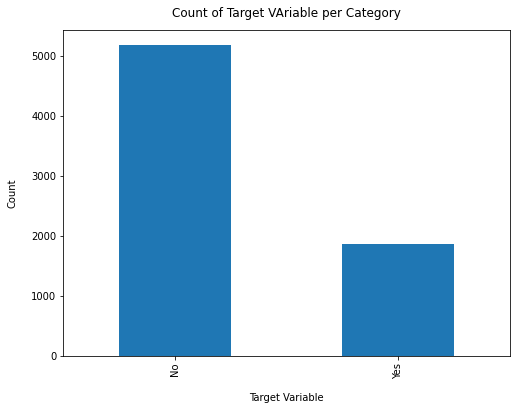

In [10]:
dataset['Churn'].value_counts().plot(kind='bar',figsize=(8,6))
plt.xlabel('Target Variable',labelpad=14)
plt.ylabel('Count',labelpad=14)
plt.title('Count of Target VAriable per Category',y=1.02)

In [11]:
dataset['Churn'].value_counts()*100/len(dataset['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [12]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
missing=pd.DataFrame(dataset.isnull()*100/dataset.shape[0]).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


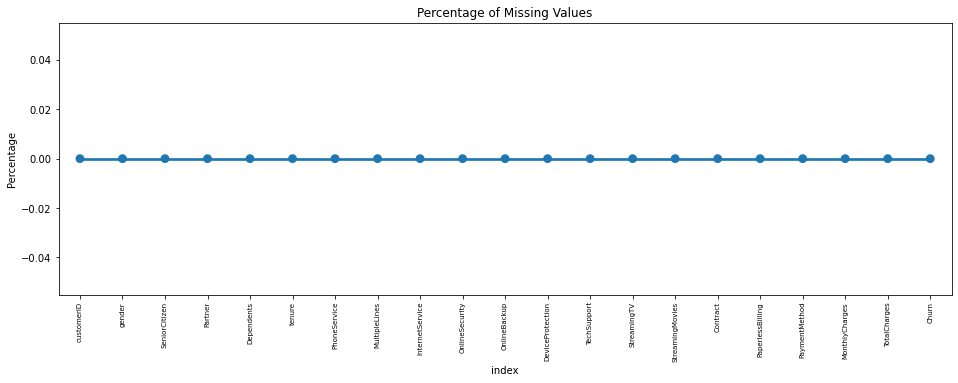

In [14]:
missing=pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title('Percentage of Missing Values')
plt.ylabel("Percentage")
plt.show()


## Data Cleaning

In [15]:
newdata=dataset.copy()

In [16]:
newdata.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [17]:
newdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
newdata['TotalCharges']=pd.to_numeric(newdata.TotalCharges,errors='coerce')

In [19]:
newdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
newdata[newdata['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
newdata.dropna(how='any',inplace=True)

In [22]:
newdata['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

Dividing the customers into bins based on tenure eg. for tenure <12 months, we assign a tenure group of 1-12
for tenure between 13-24 months we assign a tenure group 13-24 and so on.

In [23]:
newdata.tenure.max()

72

In [24]:
labels=['{0}-{1}'.format(i,i+11) for i in range(1,72,12)]

In [25]:
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [26]:
newdata['tenure_group']=pd.cut(newdata.tenure,range(1,80,12),right=False,labels=labels)

In [27]:
newdata['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_group, dtype: int64

In [28]:
newdata.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12


In [29]:
newdata.drop(columns=['tenure','customerID'],axis=1,inplace=True)

In [30]:
newdata.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36


## Univariate Analysis

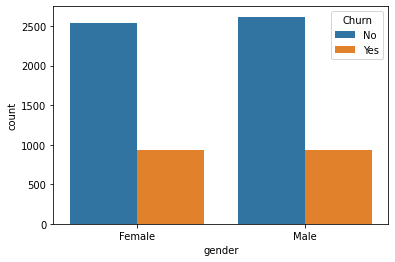

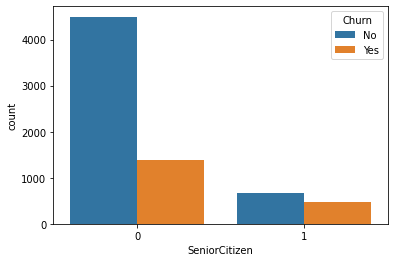

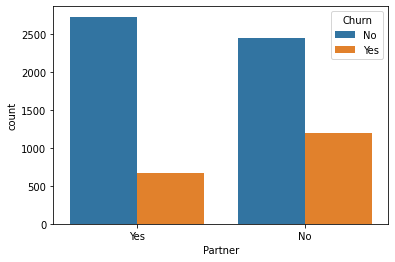

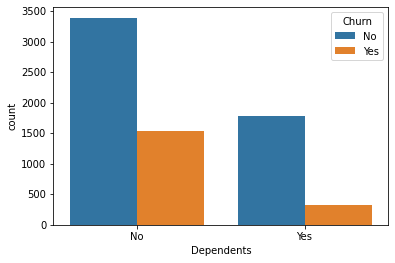

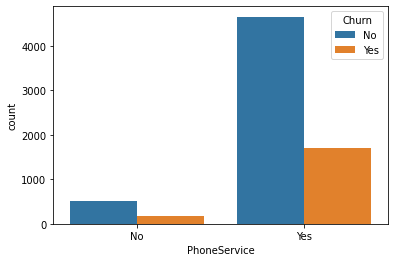

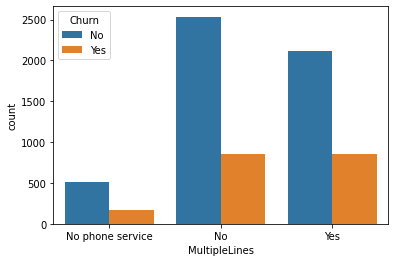

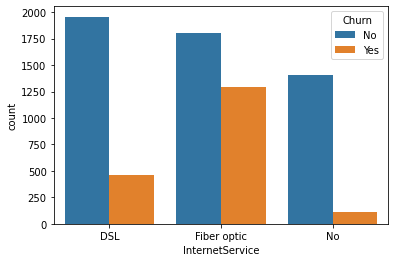

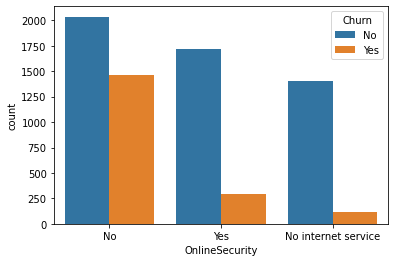

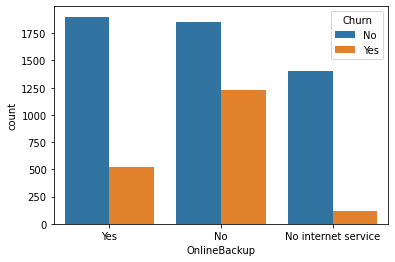

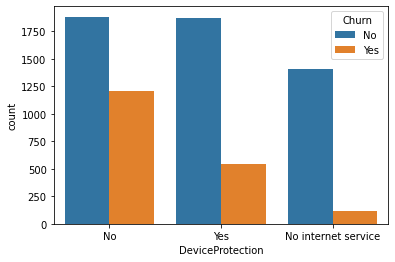

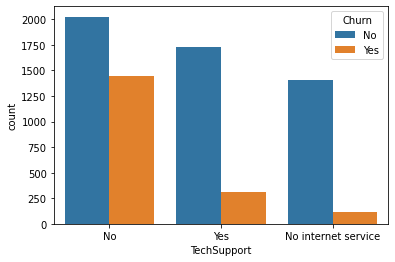

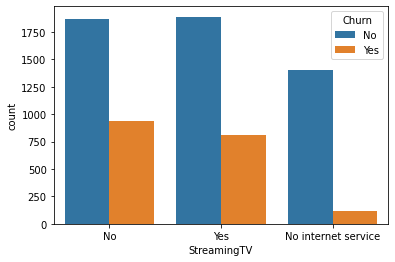

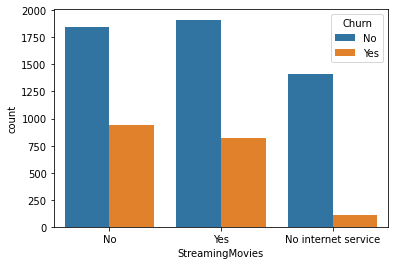

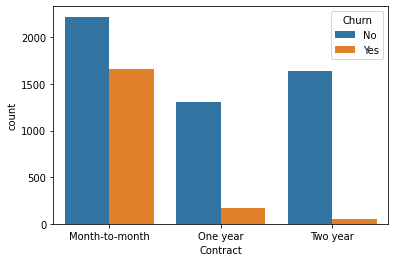

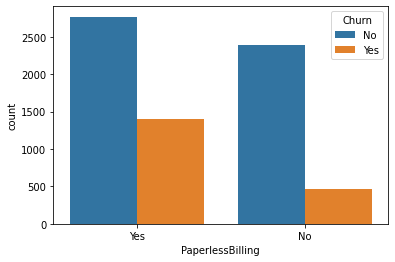

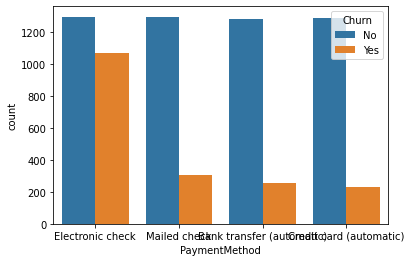

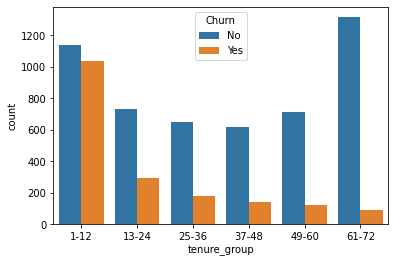

In [31]:
for i,perdictor in enumerate(newdata.drop(columns=["Churn","TotalCharges","MonthlyCharges"])):
  plt.figure(i)
  sns.countplot(data=newdata,x=perdictor,hue='Churn')

Converting target variable "Churn" to binary numeric.

In [32]:
newdata.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36


In [33]:
newdata["Churn"]=newdata.Churn.map(dict(Yes=1, No=0))

In [34]:
newdata.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Converting all categorical variables into dummy variables.

In [35]:
newdata_dummies=pd.get_dummies(newdata)
newdata_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [36]:
newdata_dummies.shape

(7032, 51)

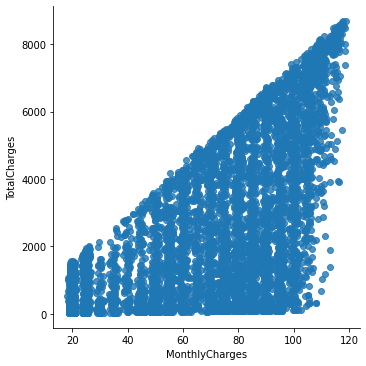

In [37]:
sns.lmplot(data=newdata_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

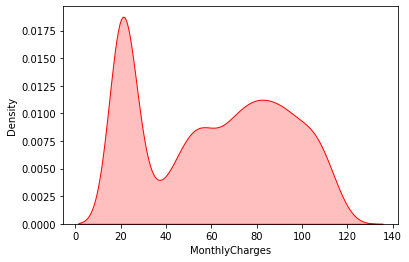

In [38]:
mth=sns.kdeplot(newdata_dummies.MonthlyCharges[(newdata_dummies['Churn']==0)],color='Red',shade=True)

Text(0.5, 1.0, 'Monthly Chaeges by Churn')

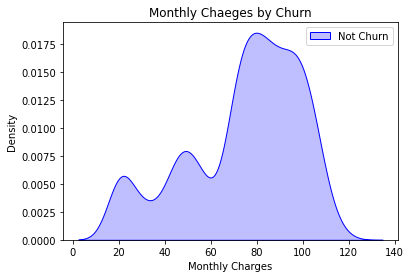

In [39]:
mth=sns.kdeplot(newdata_dummies.MonthlyCharges[(newdata_dummies['Churn']==1)],color='Blue',shade=True)
mth.legend(['Not Churn','Churn'],loc='upper right')
mth.set_ylabel('Density')
mth.set_xlabel('Monthly Charges')
mth.set_title('Monthly Chaeges by Churn')

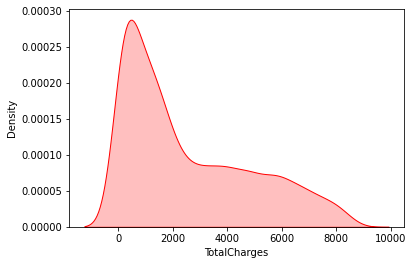

In [40]:
tot=sns.kdeplot(newdata_dummies.TotalCharges[(newdata_dummies['Churn']==0)],color="Red",shade=True)

Text(0.5, 1.0, 'Total Charges by Churn')

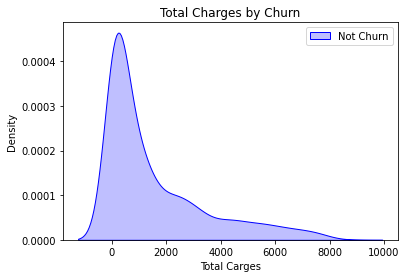

In [41]:
tot=sns.kdeplot(newdata_dummies.TotalCharges[(newdata_dummies['Churn']==1)],color='Blue',shade=True)
tot.legend(['Not Churn','Churn'],loc='upper right')
tot.set_ylabel('Density')
tot.set_xlabel('Total Carges')
tot.set_title('Total Charges by Churn')


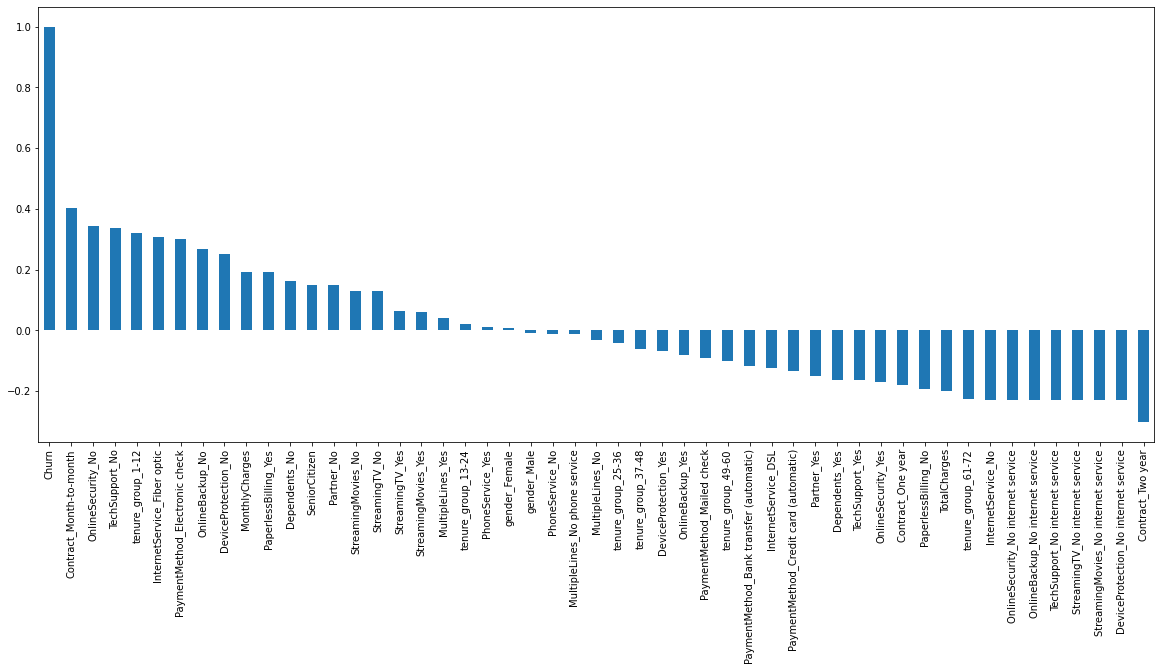

In [42]:
plt.figure(figsize=(20,8))
newdata_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

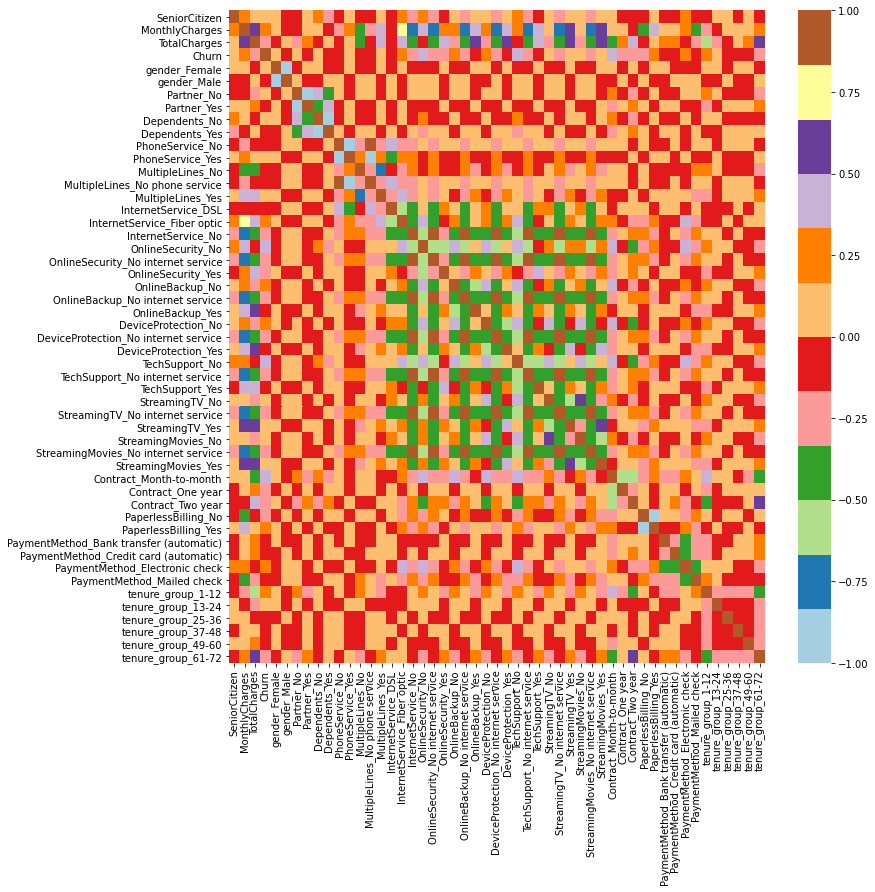

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(newdata_dummies.corr(),cmap='Paired')

## Bivariate Analysis

In [44]:
newdata.head(1)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12


In [45]:
new_df1_target0=newdata.loc[newdata['Churn']==0]
new_df1_target1=newdata.loc[newdata['Churn']==1]

In [46]:
def uniplot(df,col,title,hue=None):
  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize']=20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30
  temp=pd.Series(data=hue)
  fig,ax=plt.subplots()
  width=len(df[col].unique())+7+4*len(temp.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette="bright")
  plt.show()


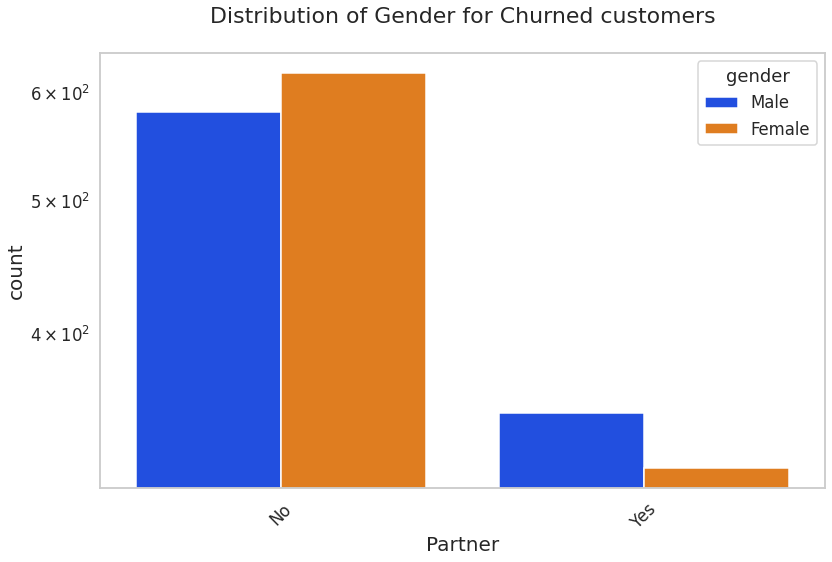

In [47]:
uniplot(df=new_df1_target1,col='Partner',title="Distribution of Gender for Churned customers",hue='gender')

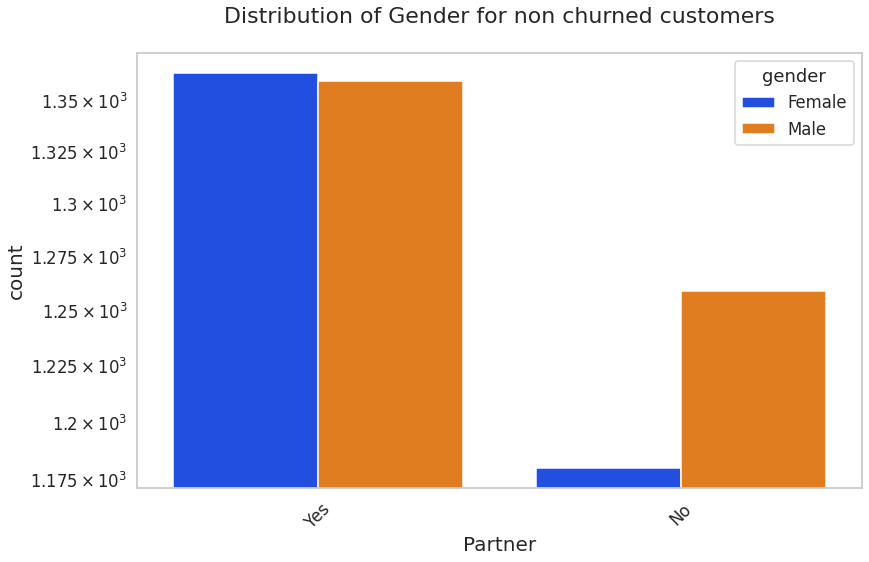

In [48]:
uniplot(new_df1_target0,col="Partner",title="Distribution of Gender for non churned customers",hue="gender")

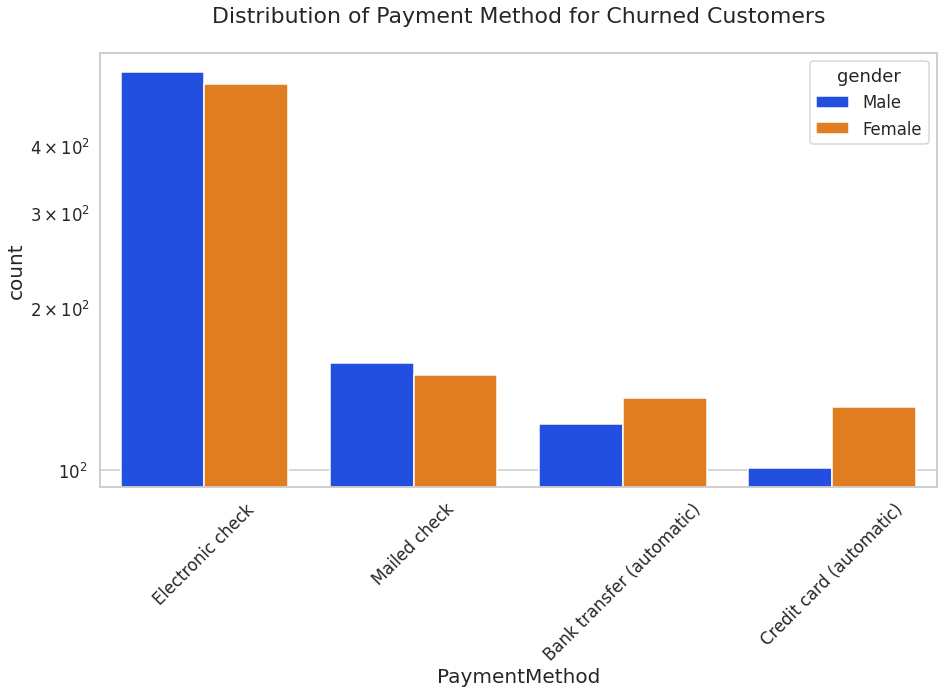

In [49]:
uniplot(new_df1_target1,col='PaymentMethod',title="Distribution of Payment Method for Churned Customers",hue="gender")

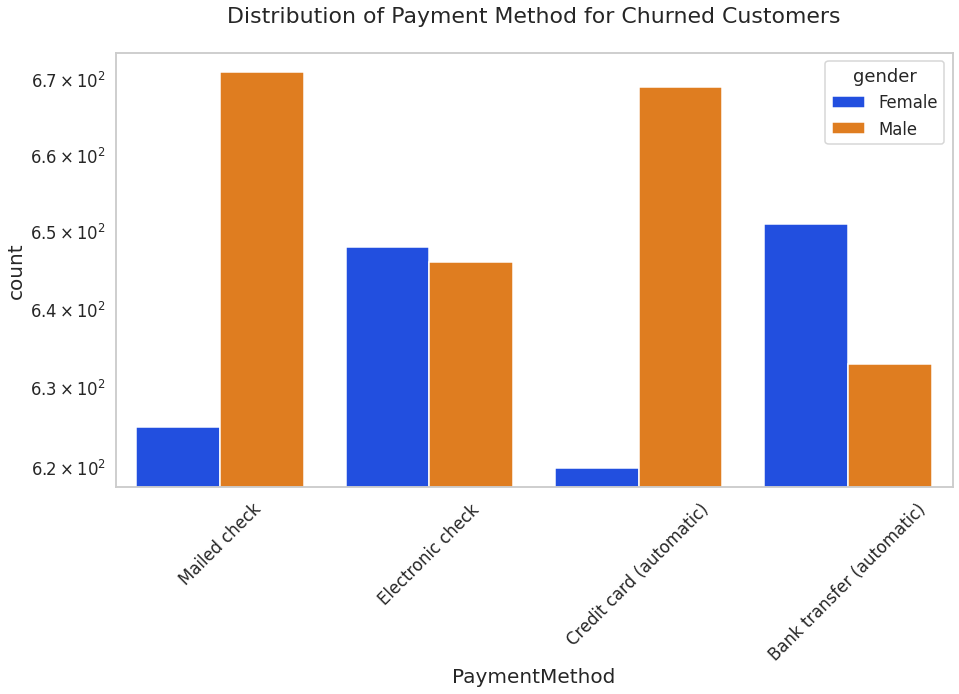

In [50]:
uniplot(new_df1_target0,col='PaymentMethod',title="Distribution of Payment Method for Churned Customers",hue="gender")

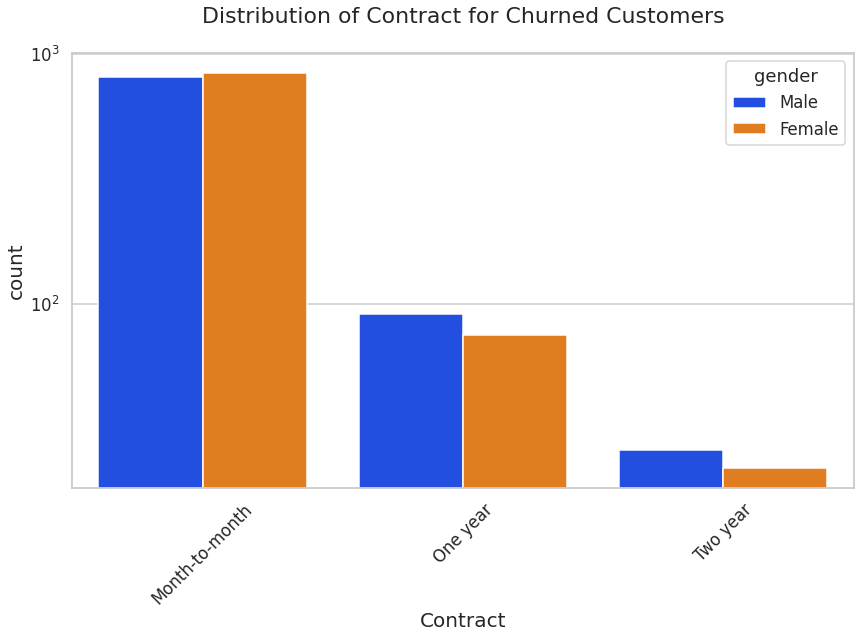

In [51]:
uniplot(new_df1_target1,col='Contract',title="Distribution of Contract for Churned Customers",hue="gender")

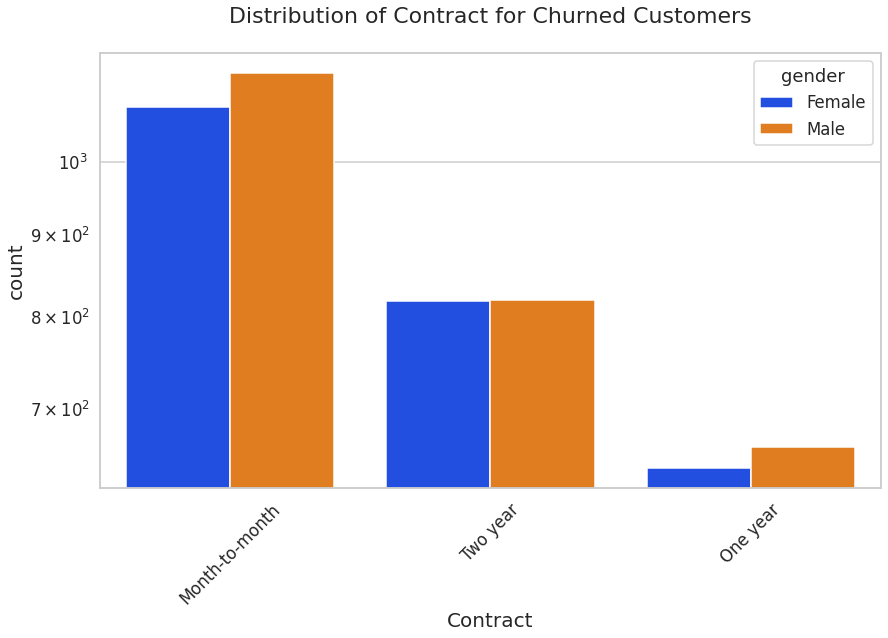

In [52]:
uniplot(new_df1_target0,col='Contract',title="Distribution of Contract for Churned Customers",hue="gender")

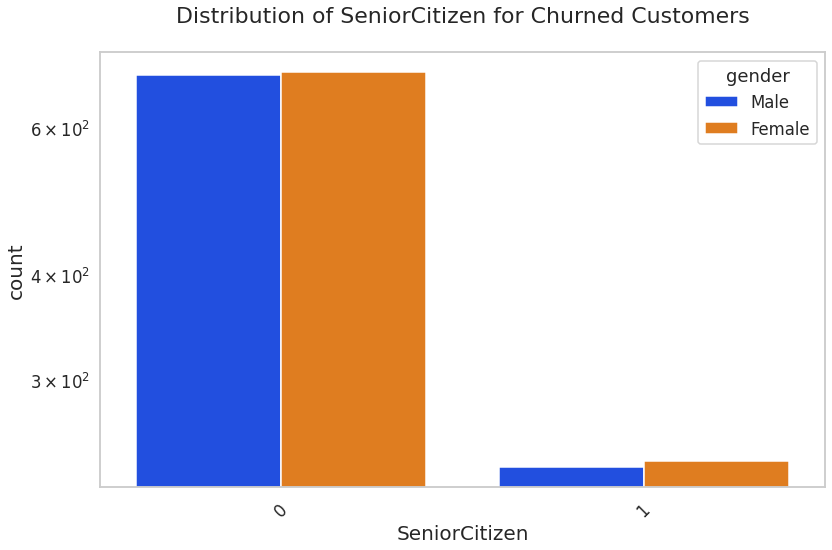

In [53]:
uniplot(new_df1_target1,col='SeniorCitizen',title="Distribution of SeniorCitizen for Churned Customers",hue="gender")

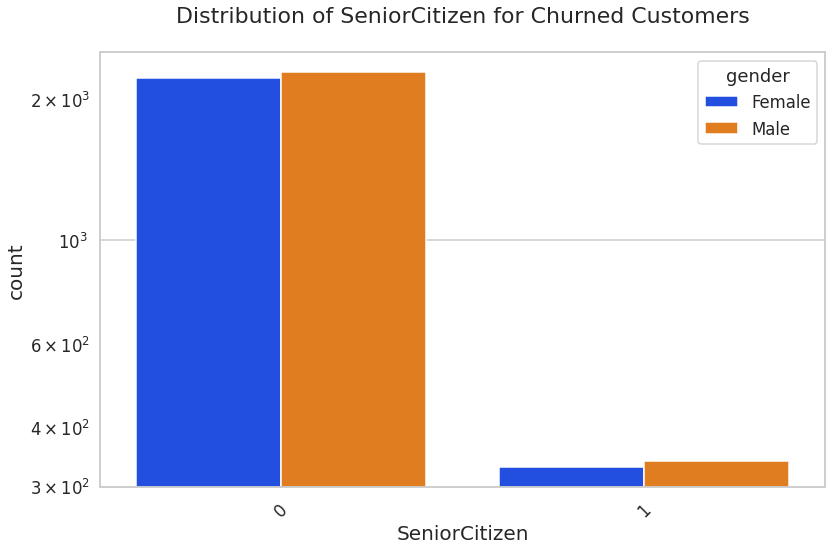

In [54]:
uniplot(new_df1_target0,col='SeniorCitizen',title="Distribution of SeniorCitizen for Churned Customers",hue="gender")

In [55]:
newdata_dummies.to_csv('Cleaned_Telecom_Churn.csv')

## Churn Analysis Building Model

In [56]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [57]:
df=pd.read_csv("Cleaned_Telecom_Churn.csv")
df.head(3)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [58]:
df=df.drop('Unnamed: 0',axis=1)

In [59]:
df.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [60]:
x=df.drop('Churn',axis=1)

In [61]:
x.head(2)

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0


In [62]:
x.shape

(7032, 50)

In [63]:
y=df.Churn

In [64]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [65]:
y.shape

(7032,)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Decision Tree Classifier

In [67]:
model=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [68]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [69]:
y_pred=model.predict(x_test)

In [70]:
model.score(x_train,y_train)

0.808

In [71]:
model.score(x_test,y_test)

0.7718550106609808

In [72]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1020
           1       0.60      0.53      0.56       387

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Improving the results

In [73]:
sm=SMOTEENN()

In [74]:
x_resampled,y_resampled=sm.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [75]:
xr_train,xr_test,yr_train,yr_test=train_test_split(x_resampled,y_resampled,test_size=0.2)

In [76]:
model_smoteen=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [77]:
model_smoteen.fit(xr_train,yr_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [78]:
yr_pred=model_smoteen.predict(xr_test)

In [79]:
model_smoteen.score(xr_train,yr_train)

0.9467696930671818

In [80]:
model_smoteen.score(xr_test,yr_test)

0.9236051502145923

In [81]:
print(metrics.classification_report(yr_test,yr_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       528
           1       0.92      0.94      0.93       637

    accuracy                           0.92      1165
   macro avg       0.92      0.92      0.92      1165
weighted avg       0.92      0.92      0.92      1165



In [82]:
print(metrics.confusion_matrix(yr_test,yr_pred))

[[475  53]
 [ 36 601]]


## Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
model_rf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [85]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [86]:
y_pred=model_rf.predict(x_test)

In [87]:
model_rf.score(x_train,y_train)

0.8119111111111111

In [88]:
model_rf.score(x_test,y_test)

0.7889125799573561

In [89]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1020
           1       0.67      0.45      0.54       387

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.77      1407



Improving the Results

In [90]:
sm=SMOTEENN()

In [91]:
model_rf_smoteen=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [92]:
model_rf_smoteen.fit(xr_train,yr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [93]:
yr_pred1=model_rf_smoteen.predict(xr_test)

In [94]:
model_rf_smoteen.score(xr_train,yr_train)

0.9459111397295557

In [95]:
model_rf_smoteen.score(xr_test,yr_test)

0.9261802575107296

Result improved

## Applying Principal Component Analysis

In [96]:
from sklearn.decomposition import PCA

In [97]:
pca=PCA(0.9)

In [98]:
xr_train_pca=pca.fit_transform(xr_train)
xr_test_pca=pca.fit_transform(xr_test)
explained_variance=pca.explained_variance_ratio_

In [99]:
model=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=100,max_depth=6,min_samples_leaf=8)

In [100]:
model.fit(xr_train_pca,yr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [101]:
y_pred_pca=model.predict(xr_test_pca)

In [102]:
model.score(xr_test_pca,yr_test)

0.632618025751073

In [103]:
print(metrics.classification_report(yr_test,y_pred_pca))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       528
           1       0.66      0.66      0.66       637

    accuracy                           0.63      1165
   macro avg       0.63      0.63      0.63      1165
weighted avg       0.63      0.63      0.63      1165



With PCA we cant see any improvements in the results let's finalise the results and save the curresnt results.

In [104]:
import pickle


In [105]:
filename='model.sav'

In [106]:
pickle.dump(model_rf_smoteen,open(filename,'wb'))

In [107]:
load_model=pickle.load(open(filename,'rb'))
model_score=load_model.score(xr_test, yr_test)

## Final Model
RF Classifier with SMOTEEN is the final model.